In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16614, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 16614 (delta 48), reused 56 (delta 27), pack-reused 16522
Receiving objects: 100% (16614/16614), 15.15 MiB | 14.85 MiB/s, done.
Resolving deltas: 100% (11405/11405), done.


In [10]:
%cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5


In [4]:
%pip install -qr requirements.txt

In [5]:
import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [11]:
!kaggle datasets download -d andy8744/playing-cards-object-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/andy8744/playing-cards-object-detection-dataset
License(s): CC0-1.0
 98% 657M/674M [00:07<00:00, 72.5MB/s]
100% 674M/674M [00:07<00:00, 96.2MB/s]


In [12]:
%cd /content/yolov5/data/dataset

/content/yolov5/data/dataset


In [13]:
!unzip /content/yolov5/playing-cards-object-detection-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/images/752527280_jpg.rf.1190e1a64bf65eed36d1d1cba0ac89e0.jpg  
  inflating: valid/images/752545673_jpg.rf.a60febd8226453d8a31f23bc95066bdf.jpg  
  inflating: valid/images/753807313_jpg.rf.9e64e6e8fa656d8c60c8320758310111.jpg  
  inflating: valid/images/753832832_jpg.rf.9d7c237e032adf4e7d675dfc6ab89ca0.jpg  
  inflating: valid/images/753940151_jpg.rf.1faa4fd0ad6dce6f54cc9a0cca492819.jpg  
  inflating: valid/images/754592338_jpg.rf.84afe9ef94ca63180e1a6010b537a3d5.jpg  
  inflating: valid/images/755541347_jpg.rf.9a3eff745a4c8e98256b2a33a5be770a.jpg  
  inflating: valid/images/756343422_jpg.rf.01a496d12ada09d5d2855a62bdbeba52.jpg  
  inflating: valid/images/756346191_jpg.rf.deebe7514e878a1ed73af16ee8cf0184.jpg  
  inflating: valid/images/756475817_jpg.rf.fe6c19cb47d90fa88d72d3d16fc8c943.jpg  
  inflating: valid/images/756729346_jpg.rf.9f86fcbf28d402f0c66d65db496e0845.jpg  
  inflating: valid/images/756742467_jpg.rf.ebdf

In [ ]:
%cd ..

/content/yolov5


# **Training the Model**

In [ ]:
!python train.py --img 416 --batch 64 --workers 4 --epochs 2 --data /content/yolov5/data/dataset/data.yaml --weights yolov5s.pt --cache

2024-05-12 16:01:18.848558: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 16:01:18.848626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 16:01:18.960417: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=Fal

#**Inference on Model**

In [15]:
%cd ..

/content/yolov5


In [16]:
!python detect.py --weights /content/yolov5/best.pt --img 416 --conf 0.25 --source /content/yolov5/data/dataset/test/images

detect: weights=['/content/yolov5/best.pt'], source=/content/yolov5/data/dataset/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 213 layers, 7150369 parameters, 0 gradients, 16.2 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2000 /content/yolov5/data/dataset/test/images/000246247_jpg.rf.fb915aef7c063ce2ac971f8de0d8b2c1.jpg: 416x416 2 7cs, 1 8d, 1 As, 8.1ms
image 2/2000 /content/yolov5/data/dataset/test/images/000355142_jpg.rf.7e5eff691d035112dd4b5021fe38a46c.jpg: 416x416 2 4ss, 1 8h, 1

In [17]:
import os
inferred_test_imgs = os.listdir("./runs/detect/exp")
inferred_test_imgs[:9]

['540073345_jpg.rf.8b8aae325d2a987cf19074859d95bda6.jpg',
 '914852170_jpg.rf.9ff12090cfc364686dcd5d4670f0e00b.jpg',
 '812503149_jpg.rf.deeabfabeb84075bcc125d6966e7c7b4.jpg',
 '559576838_jpg.rf.d9c02a1449dadb35ea8ab7622a363765.jpg',
 '915050900_jpg.rf.b7f020b4fa10dc192265759229da57f9.jpg',
 '441737119_jpg.rf.239fd2b2e79c52718367519741268013.jpg',
 '378131889_jpg.rf.724fcb8913b791fa60c1d7e7ec42ced8.jpg',
 '265586819_jpg.rf.270c16b31228a38363f1477f9dfb47cc.jpg',
 '352530453_jpg.rf.cfac93efcaf4607ef10d0d27b3e7e11a.jpg']

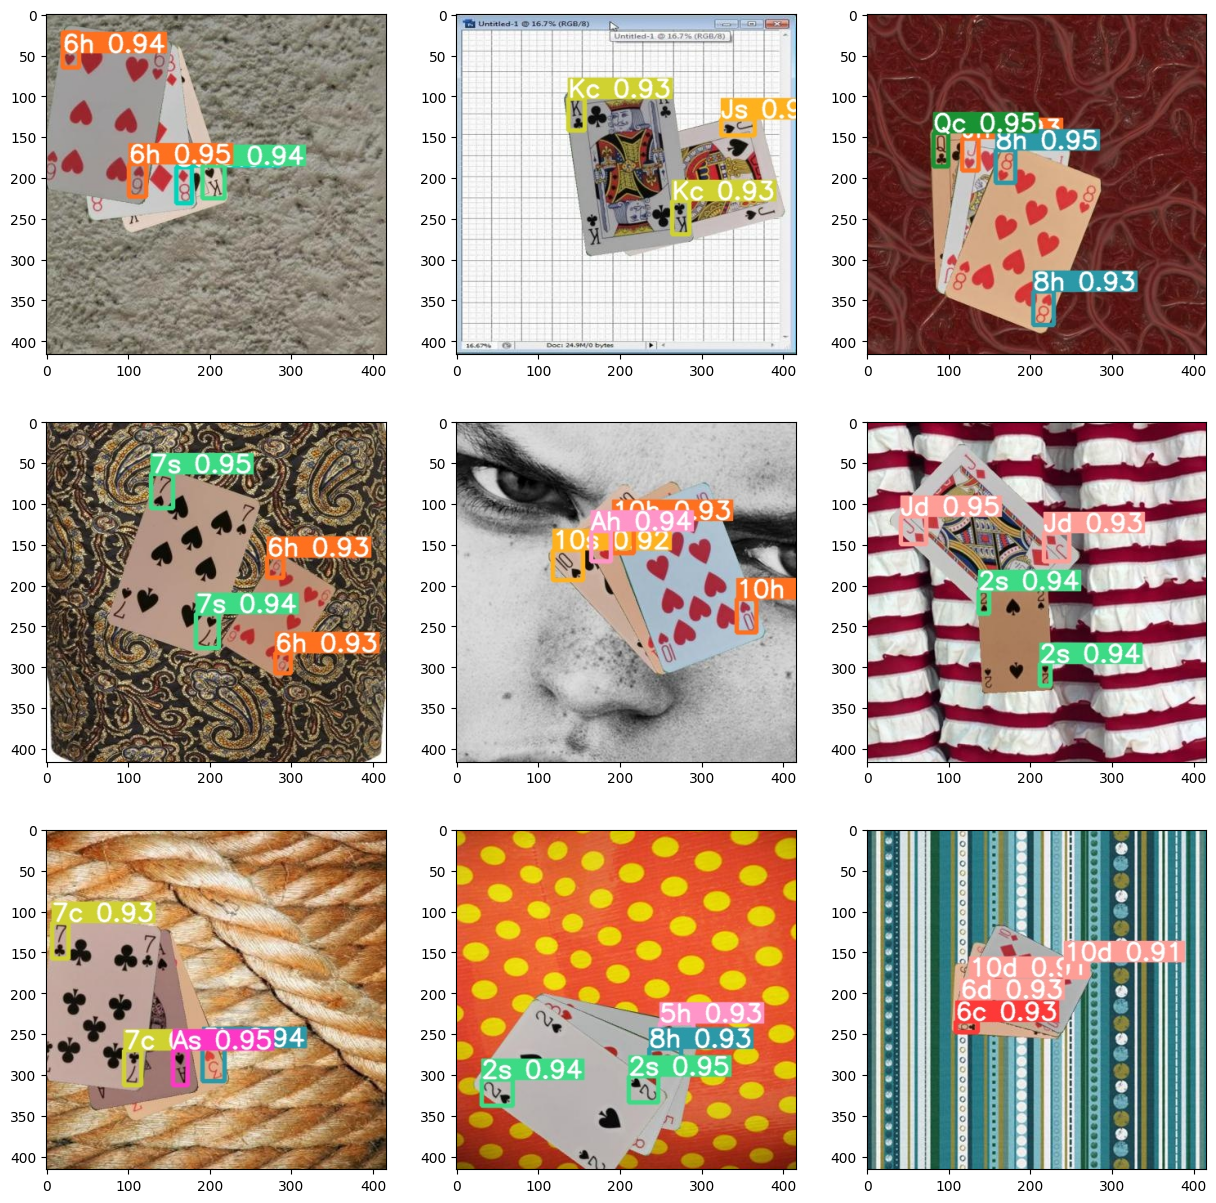

In [18]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(15,15)) # specifying the overall grid size

for i, image in enumerate(inferred_test_imgs[:9]):
    filename = os.path.join("./runs/detect/exp", image)
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3,3,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(img)

plt.show()